## bout level analyses

Here we're interested in whether or not we can identify faster dynamics time-locked to the initiation of lick bouts

In [469]:
# we need t reload the analysis and unshift everything
training = analysis(norm_to_median_pre_stim, 1800, 
                    ds_freq = 10, ex = 10, detrend = True, 
                    detrend_method = detrend_405_constrained)
training.load_append_save(Path('training.npy'))
training.compute()

loading data from file...
recomputing...
successful


In [470]:
# first let's reformat the data
# get the lick data
lick_times = training.raw_data.droplevel('trial').map(lambda x: (x.left_licks)/1e3)
css = mp[lick_times.index.get_level_values('cond').isin(cs['+']).astype(int)]
day = lick_times.index.get_level_values('cond').str.extract('(\d)')[0].map(int).tolist()
mouse = lick_times.index.get_level_values('mouse')
lick_times.index = pd.MultiIndex.from_tuples(list(zip(day, mouse, css )), names = [ 'day', 'mouse', 'cs'])
lick_times.sort_index(inplace = True)

# also for the sake of future analysis it may be easier to organize the photometry data similarly
training_490 = training.all_490.copy()
css = mp[training_490.columns.get_level_values('cond').isin(cs['+']).astype(int)]
day = training_490.columns.get_level_values('cond').str.extract('(\d)')[0].map(int).tolist()
mouse = training_490.columns.get_level_values('mouse')
training_490.columns = pd.MultiIndex.from_tuples(list(zip(day, mouse, css)), 
                                                 names = [ 'day', 'mouse', 'cs'])
training_490.sort_index(axis=1, inplace = True)
lick_times

day  mouse   cs
1    adm445  +     [10.608, 10.81, 10.904, 11.016, 11.128, 11.248...
             -     [49.588, 50.361, 112.977, 113.106, 113.427, 24...
     adm480  +     [21.158, 21.243, 21.388, 21.479, 21.594, 21.68...
             -     [40.966, 41.289, 41.408, 41.497, 41.596, 41.83...
     adm484  +     [77.085, 77.177, 77.285, 77.383, 77.461, 77.55...
             -     [5.287, 5.383, 5.487, 5.571, 5.67, 5.773, 5.87...
     adm485  +     [23.397, 23.49, 23.597, 23.683, 23.88, 23.995,...
             -     [126.382, 126.49, 126.7, 126.813, 126.922, 127...
2    adm445  +     [32.225, 32.327, 32.417, 32.702, 32.809, 32.91...
             -     [12.802, 12.941, 13.081, 13.189, 13.387, 13.49...
     adm480  +     [246.19, 246.3, 246.397, 246.51, 246.714, 246....
             -     [7.074, 7.18, 7.264, 7.471, 7.577, 7.694, 7.80...
     adm484  +     [149.388, 149.485, 149.561, 149.659, 149.86, 1...
             -     [316.392, 316.488, 316.59, 316.78, 316.995, 31...
     adm485  +    

In [471]:
training_490

day             1                                                              \
mouse      adm445              adm480              adm484              adm485   
cs              +         -         +         -         +         -         +   
-300.0  -0.024526 -0.103773 -0.001916  0.010773  0.013353 -0.129060 -0.104754   
-299.9  -0.040308 -0.102631 -0.003237  0.024356  0.035595 -0.155525 -0.104420   
-299.8  -0.019129 -0.109608 -0.001482  0.015673  0.057313 -0.157084 -0.106751   
-299.7  -0.028403 -0.108848 -0.002281  0.010319  0.047762 -0.151114 -0.113761   
-299.6  -0.027529 -0.120504  0.005601  0.016265  0.017092 -0.137650 -0.106351   
...           ...       ...       ...       ...       ...       ...       ...   
 1799.6 -0.088547  0.084532 -0.369302 -0.058835 -0.187451 -0.061958 -0.220895   
 1799.7 -0.099437  0.102769 -0.374145 -0.047553 -0.208601 -0.023111 -0.219264   
 1799.8 -0.110626  0.089849 -0.376115 -0.048141 -0.225687 -0.029018 -0.221408   
 1799.9 -0.113597  0.081565 -0.374790 -0.046644 -0.162664 -0.029226 -0.216466   
 1800.0 -0.115182  0.057488 -0.381652 -0.038046 -0.148906 -0.031198 -0.206961   

day                       2            ...                             3  \
mouse                adm445            ...    adm485              adm445   
cs              -         +         -  ...         +         -         +   
-300.0  -0.021715 -0.005690  0.008500  ... -0.008797 -0.083796 -0.056325   
-299.9  -0.030186 -0.010810  0.005734  ... -0.009420 -0.088263 -0.044782   
-299.8  -0.019524 -0.013465  0.000542  ... -0.014704 -0.071547 -0.032577   
-299.7  -0.043523 -0.032216 -0.018704  ... -0.001955 -0.069835 -0.035333   
-299.6  -0.042930 -0.047306 -0.007805  ... -0.012126 -0.062578 -0.029087   
...           ...       ...       ...  ...       ...       ...       ...   
 1799.6 -0.022615  0.014932  0.164158  ... -0.292898  0.027159 -0.073332   
 1799.7 -0.013734  0.002580  0.153366  ... -0.286105  0.019344 -0.107590   
 1799.8  0.015554  0.027291  0.147669  ... -0.293830  0.015610 -0.076497   
 1799.9  0.004568 -0.003017  0.132650  ... -0.299542  0.008423 -0.089260   
 1800.0 -0.009278  0.016276  0.127052  ... -0.288236  0.005419 -0.093629   

day                                                                            
mouse                adm480              adm484              adm485            
cs              -         +         -         +         -         +         -  
-300.0   0.060404  0.211922 -0.016201  0.083212 -0.015086  0.006037 -0.024313  
-299.9   0.063857  0.214370 -0.015248  0.065602 -0.002102  0.005497 -0.011451  
-299.8   0.056653  0.222059 -0.018460  0.075445 -0.026873  0.009068 -0.006767  
-299.7   0.071807  0.223547 -0.014156  0.082003  0.022146  0.018371 -0.005856  
-299.6   0.065462  0.227147 -0.019217  0.067426 -0.013291  0.017028 -0.009662  
...           ...       ...       ...       ...       ...       ...       ...  
 1799.6  0.167330 -0.442648 -0.220388 -0.016920 -0.025349 -0.145390 -0.214960  
 1799.7  0.182306 -0.450313 -0.223047 -0.030589 -0.011759 -0.153336 -0.211892  
 1799.8  0.194542 -0.439525 -0.226748 -0.033241 -0.018777 -0.143880 -0.208730  
 1799.9  0.213156 -0.437219 -0.226761 -0.036437 -0.010681 -0.155597 -0.207752  
 1800.0  0.197392 -0.435200 -0.239087 -0.055415 -0.002223 -0.154257 -0.208869  

[21001 rows x 24 columns]

---
### a side note about extracting fast dynamics
AgRP dynamics during nutrient infusions are largely dominated by a slow drift. If there are any phasic effects buried in the signal that occur around the beginnings of bouts we must subtract this slow drift from the signal first to see it. There are two main ways I can think of doing this. One is detailed below, which involves applying a lowpass filter to the data with a sufficiently low cutoff frequency to only capture the slow dynamics. This approach operates under the assumption that the only thing happening in this frequency band is this tonic response to the infusion so we will explore a model-based approach later. Notably, subtracting the low pass filtered data is mostly equivalent to applying a high-pass filter. This approach just allows us to visualize what we are subtracting
#### a filtering approach


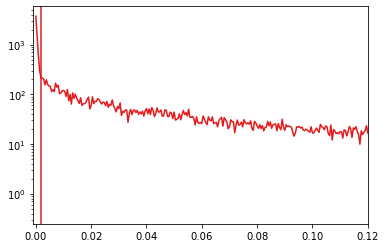

In [472]:
# get the cs+ data
csp = training_490.loc[:,pd.IndexSlice[:,:,'+']].fillna(method='ffill')
csm = training_490.loc[:,pd.IndexSlice[:,:,'-']].fillna(method='ffill')


#compute the fft
dft_vals = np.abs(csp.apply(np.fft.fft, axis=0).values)
freqs = np.fft.fftfreq(len(csp), 1/training.ds_freq)
freqs  = freqs[:len(freqs)//2]
dft_vals = dft_vals[:len(dft_vals)//2]

#plot the power spectrum
plt.semilogy(freqs,dft_vals.mean(axis=1))
plt.xlim(-.001,.12)

# candidate cutoff frequency
plt.axvline(0.002)

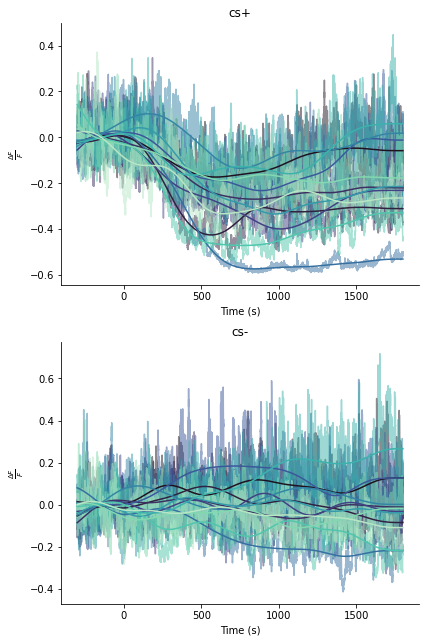

In [473]:
# get the filter coefficients
detrend_params = signal.butter(3, 0.002, btype = 'lowpass', fs = training.ds_freq)

fig, ax = plt.subplots(2,1, figsize = (6,9))
ax[0].set_prop_cycle( color = sns.color_palette('mako', csp.shape[-1]))
ax[0].plot(csp.index, csp.fillna(method='ffill').values, alpha=0.5)
ax[0].plot(csp.index,signal.filtfilt(*detrend_params , csp.fillna(method='ffill').values, axis=0))
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel(r'$\frac{\Delta F}{F}$')
ax[0].set_title("cs+")
ax[1].set_prop_cycle( color = sns.color_palette('mako', csp.shape[-1]))
ax[1].plot(csp.index,csm.fillna(method='ffill').values, alpha=0.5)
ax[1].plot(csp.index,signal.filtfilt(*detrend_params , csm.fillna(method='ffill').values, axis=0))
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel(r'$\frac{\Delta F}{F}$')
ax[1].set_title("cs-")
sns.despine()
fig.tight_layout(pad = 1.)
fig.savefig(os.path.join('figures', 'methods', 'pdfs','filtered_data.pdf'))
fig.savefig(os.path.join('figures', 'methods', 'svgs','filtered_data.svg'))

#### model -based approach
Here we will try modeling the response to an infusion as a sum of 2 sigmoids, one that represents the drop in AgRP activity and one that represents the return to baseline. Consider the sigmoid function 

$$\sigma(x|a,b,k) = \frac{k}{1+e^{-a(x-b)}}$$

where $b$ represents the location of center of the sigmoid on the x axis, $a$ controls the steepness $k$ is a scaling factor which will account for the height. Altogether this equation produces the following graph

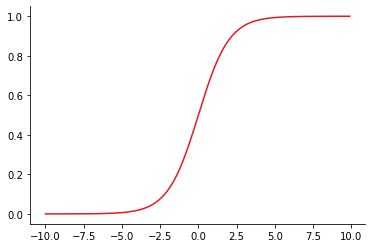

In [474]:
from scipy.special import expit
x = np.arange(-10,10,step=.1)
a,b,k = 1,0,1
plt.plot(x, k*expit(a*(x-b)));
sns.despine()

Now given this function as our building block let us define our model as follows

$$\sigma_1(x|a_1, b_1, k_1) = \frac{-k_1}{1+e^{-a_1(x-b_1)}}$$
$$\sigma_2(x|a_2, b_2, k_2) = \frac{k_2}{1+e^{-a_2(x-b_2)}}$$
$$ f(x) = \sigma_1(x) + \sigma_2(x) $$

where $\sigma_1(x)$ represents the drop in activity and $\sigma_2(x)$ represents the return to baseline. The benefit of this model is that the parameters are interpretable. $k_1$ denotes the magnitude of the drop in AgRP activity, $a_1$ represents the speed of the drop, and $b_1$ denotes the time lag of the drop. Meanwhile, $k_2$ represents how much the signal returns to baseline, $a_2$ represents the speed of the return to baseline, and $b_1$ denotes the time lag of the return to baseline. 

For the sake of model fitting and even better interpretability it will be in our best interest to further simplify the model. Note we've already made one simplification by not fitting a constant since we've already normalized our data such that the median of the pre-stimulus region is 0. Our additional simplifications are as follows:

- Let's assume $k_1 = k_2$ since on long time scales, AgRP activity typically returns to baseline.

- For ease of further calculations we can reparametrize $\sigma_2(x)$ such that the constant $b_2$ will define the time when the sigmoid starts to rise. To do this, let $\sigma_2^{*}(x|a_2, k_2, b_2) = \sigma_2(x + \alpha(a_2, k_2)|a_2, k_2, b_2) $ where $\alpha$ is the time where a sigmoid with $b=0$, $a = a_2$, $k = |k_2|$ would start to rise. The idea is we are shifting the sigmoid such that the rise occurs at $x = 0$ for $b_2 = 0$. To obtain $\alpha$ we may find the most negative value $x$ for which the $n^{th}$ derivative of $\sigma(x|a_2,0,k_2)$ is 0, where $n>2$ since the root of $\sigma_1''(x)$ will return the inflection point at $x = 0$. Greater values of n will yield values closer to the end of the flat region at the beginning of the sigmoid. We find n=? produces reasonable results

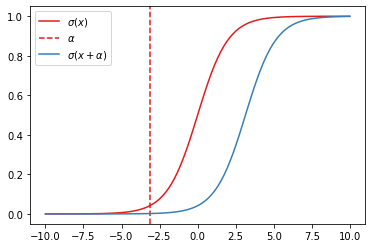

In [475]:
from scipy.special import expit
const1 = 2 / (13 + np.sqrt(105) + np.sqrt(26*np.sqrt(105) + 270))
sig_start = lambda a, b: b + np.log(const1)/a 
const2 = 2 / (13 + np.sqrt(105) - np.sqrt(26*np.sqrt(105) + 270))
sig_end = lambda a, b: b + np.log(const2)/a 

x = np.linspace(-10,10,100)
plt.plot(x,expit(x), label = r'$\sigma(x)$')
plt.axvline(sig_start(1,0), label = r'$\alpha$', ls='--')
plt.plot(x,expit(x+sig_start(1,0)), label = r'$\sigma(x + \alpha)$');
plt.legend()

## 

- Given this re-parametrization, we can redefine $b_2$ as some constant $b_2 = \beta(a_1,b_1,k_1) + b_2^{*}$??  where $\beta$ is computed as the end of the $\sigma_1$ response and we constrain $b_2^{*}$ to be non-negative. We can compute $\beta$ similarly to $\alpha$. The only difference is we take the greatest value of x that satisfies $\sigma_1^{(n)}(x) = 0$. If necessary we can also force $b_2^{*}$ to be 0 such that $b_2 = \beta$.

The resulting model is as follows
\begin{align}
\sigma_1(x|a_1, b_1, k_1) & = \frac{-k_1}{1+e^{-a_1\cdot(x-b_1)}} \\
\sigma_2(x|a_2, b_2^{*}, k_1) &  = \frac{k_1}{1+e^{-a_2\cdot(x + \alpha - (\beta + b_2^{*}))}} \\
\alpha(a_1,b_1) & = \min_x \{x \in\mathbb{R} | \sigma^{(n)}(x|a_2,0,k_2) = 0 \}\\
\beta(a_1,b_1,k_1) & = \max_x \{x \in\mathbb{R} | \sigma_1^{(n)}(x|a_1,b_1,k_1) = 0 \} \\ 
f(x) & = \sigma_1(x) + \sigma_2(x) \\
\end{align}

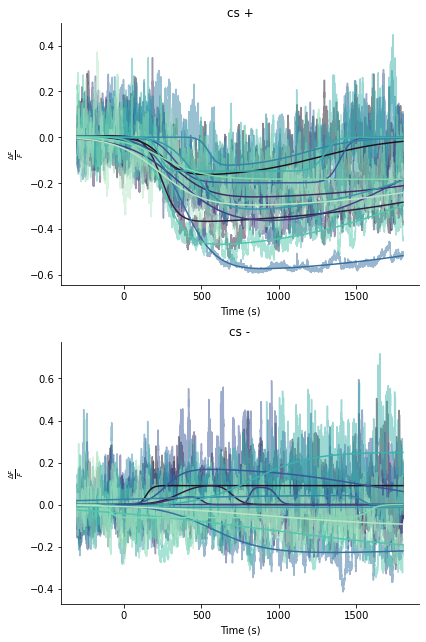

In [476]:
from scipy import optimize

const1 = 2 / (13 + np.sqrt(105) + np.sqrt(26*np.sqrt(105) + 270))
sig_start = lambda a, b: b + np.log(const1)/a 

const2 = 2 / (13 + np.sqrt(105) - np.sqrt(26*np.sqrt(105) + 270))
sig_end = lambda a, b: b + np.log(const2)/a 

expit_mod = lambda x, a, b: expit(a*(x + sig_start(a,1) - b))

def model( x, mag, drop_sp, drop_loc, ret_sp, ret_loc = 0):
    drop = mag* expit(drop_sp * (x - drop_loc))
    ret =  - mag *expit_mod(x, ret_sp, sig_end(drop_sp, drop_loc) + ret_loc)
    return drop+ret

smooth_params = signal.butter(3, 0.003, btype = 'lowpass', fs = training.ds_freq)

def fit(x):    
    try:
        x = pd.Series(signal.filtfilt(*smooth_params, x.values), 
                      index = x.index, name = x.name)
        if x.loc[0:training.t_endrec/2].mean()<x.loc[:0].mean():
            params, _ = optimize.curve_fit(model, x.index, x, 
                                           (x.min(),.01,0, .005, 0), 
                                           bounds = ([-np.inf, 0, -training.t_prestim/2, 0, 0],
                                                     [0, .1, training.t_endrec/2, .1, np.inf]),
                                           maxfev=5000)
        else:
            params, _ = optimize.curve_fit(model, x.index, x, 
                                           (x.max(),.01,200, .0005, 0), 
                                           bounds = ([0, 0,-training.t_prestim/2,0, 0],
                                                     [np.inf, .1, training.t_endrec/2, .1, np.inf]),
                                           maxfev=5000)
    except RuntimeError as e:
        print(e)
        print(f'could not find solution for {x.name}')
        print(x.loc[0:training.t_endrec/2].mean()<x.loc[:0].mean())
        params = (0,0,0,0, 0)
    return model(x.index,*params), params

def fit_subtract(x):
    return x - fit(x)[0]

params = training_490.apply(lambda x: fit(x)[1])
params.index = ['mag', 'drop_sp','drop_loc', 'ret_sp', 'ret_loc']
fitted = params.apply(lambda x: model(training.t, *x.tolist()))
fitted.index = training.t

fig, ax = plt.subplots(2,1, figsize = (6,9))
ax[0].set_prop_cycle( color = sns.color_palette('mako', csp.shape[-1]))
ax[0].plot(training_490.loc[:,pd.IndexSlice[:,:,'+']], alpha=.5)
ax[0].plot(fitted.loc[:,pd.IndexSlice[:,:,'+']])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel(r'$\frac{\Delta F}{F}$')
ax[0].set_title('cs +')
ax[1].set_prop_cycle( color = sns.color_palette('mako', csp.shape[-1]))
ax[1].plot(training_490.loc[:,pd.IndexSlice[:,:,'-']], alpha=.5)
ax[1].plot(fitted.loc[:,pd.IndexSlice[:,:,'-']])
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel(r'$\frac{\Delta F}{F}$')
ax[1].set_title('cs -')
sns.despine()
fig.tight_layout(pad = 1.)
fig.savefig(os.path.join('figures', 'methods', 'pdfs','model_fit.pdf'))
fig.savefig(os.path.join('figures', 'methods', 'svgs','model_fit.svg'))

In [477]:
params

day                  1                                            \
mouse           adm445                      adm480                 
cs                   +             -             +             -   
mag      -1.740689e-01  9.416295e-02 -3.871701e-01  9.853096e-02   
drop_sp   1.449164e-02  4.906369e-02  1.894824e-02  1.387009e-02   
drop_loc  2.461172e+02  1.439373e+02  2.430028e+02  3.522189e+02   
ret_sp    3.973037e-03  1.956459e-15  1.540732e-03  2.653684e-02   
ret_loc   1.173321e-19  1.514091e-11  4.831164e-12  5.942193e-08   

day                                                                      2  \
mouse           adm484                      adm485                  adm445   
cs                   +             -             +           -           +   
mag      -2.777794e-01  3.885222e-02 -3.938996e-01    0.082770   -0.198042   
drop_sp   8.572698e-03  1.896347e-02  6.013872e-03    0.075882    0.016950   
drop_loc  3.261452e+02  2.810608e+02  3.570523e+02  810.241613  326.193799   
ret_sp    1.796124e-03  5.349519e-02  3.577555e-03    0.046706    0.027471   
ret_loc   1.000497e-11  8.170021e-09  9.408463e-14   67.553765  767.771209   

day                     ...                                       3  \
mouse                   ...        adm485                    adm445   
cs                   -  ...             +             -           +   
mag       1.789229e-01  ... -3.356159e-01 -1.347588e-02   -0.147078   
drop_sp   1.580190e-02  ...  1.114660e-02  9.999998e-02    0.039785   
drop_loc  2.674770e+02  ...  4.572599e+02 -4.659463e+01  226.983325   
ret_sp    2.819362e-03  ...  2.737934e-03  4.914044e-14    0.027128   
ret_loc   8.696583e-12  ...  2.886436e-16  1.299876e+01  872.430885   

day                                                                \
mouse                         adm480                       adm484   
cs                   -             +             -              +   
mag       2.604578e-01 -4.972893e-01 -2.547911e-01      -0.187530   
drop_sp   5.414821e-03  1.291105e-02  1.490870e-03       0.007258   
drop_loc  8.312980e+02  2.559838e+02  8.999258e+02     251.629385   
ret_sp    2.239171e-09  2.116258e-03  4.210191e-14       0.000001   
ret_loc   1.046117e-16  2.734074e-13  1.199844e-02  489250.564920   

day                                              
mouse                      adm485                
cs                  -           +             -  
mag         -0.061955   -0.316735 -1.118526e-01  
drop_sp      0.047657    0.006935  2.141331e-03  
drop_loc   -89.203667  232.507804  8.999959e+02  
ret_sp       0.029880    0.001777  5.421782e-09  
ret_loc   1494.365624    0.057748  6.610322e+00  

[5 rows x 24 columns]

In [478]:
#need to subtract first lick time frm the drop_lc and ret_loc
first_lick = training.raw_data.map(lambda x: x.left_licks[0]/1e3)
css = mp[first_lick.index.get_level_values('cond').isin(cs['+']).astype(int)]
day = first_lick.index.get_level_values('cond').str.extract('(\d)')[0].map(int).tolist()
mouse = first_lick.index.get_level_values('mouse')
first_lick.index = pd.MultiIndex.from_tuples(list(zip(day, mouse, css)), 
                                             names = [ 'day', 'mouse', 'cs'])
params.loc['drop_loc']  = params.loc['drop_loc'] - first_lick
params

day                  1                                            \
mouse           adm445                      adm480                 
cs                   +             -             +             -   
mag      -1.740689e-01  9.416295e-02 -3.871701e-01  9.853096e-02   
drop_sp   1.449164e-02  4.906369e-02  1.894824e-02  1.387009e-02   
drop_loc  2.355092e+02  9.434930e+01  2.218448e+02  3.112529e+02   
ret_sp    3.973037e-03  1.956459e-15  1.540732e-03  2.653684e-02   
ret_loc   1.173321e-19  1.514091e-11  4.831164e-12  5.942193e-08   

day                                                                      2  \
mouse           adm484                      adm485                  adm445   
cs                   +             -             +           -           +   
mag      -2.777794e-01  3.885222e-02 -3.938996e-01    0.082770   -0.198042   
drop_sp   8.572698e-03  1.896347e-02  6.013872e-03    0.075882    0.016950   
drop_loc  2.490602e+02  2.757738e+02  3.336553e+02  683.859613  293.968799   
ret_sp    1.796124e-03  5.349519e-02  3.577555e-03    0.046706    0.027471   
ret_loc   1.000497e-11  8.170021e-09  9.408463e-14   67.553765  767.771209   

day                     ...                                       3  \
mouse                   ...        adm485                    adm445   
cs                   -  ...             +             -           +   
mag       1.789229e-01  ... -3.356159e-01 -1.347588e-02   -0.147078   
drop_sp   1.580190e-02  ...  1.114660e-02  9.999998e-02    0.039785   
drop_loc  2.546750e+02  ...  4.559169e+02 -1.213706e+02  192.963325   
ret_sp    2.819362e-03  ...  2.737934e-03  4.914044e-14    0.027128   
ret_loc   8.696583e-12  ...  2.886436e-16  1.299876e+01  872.430885   

day                                                                \
mouse                         adm480                       adm484   
cs                   -             +             -              +   
mag       2.604578e-01 -4.972893e-01 -2.547911e-01      -0.187530   
drop_sp   5.414821e-03  1.291105e-02  1.490870e-03       0.007258   
drop_loc  8.256380e+02  1.720948e+02  6.773158e+02     207.691385   
ret_sp    2.239171e-09  2.116258e-03  4.210191e-14       0.000001   
ret_loc   1.046117e-16  2.734074e-13  1.199844e-02  489250.564920   

day                                              
mouse                      adm485                
cs                  -           +             -  
mag         -0.061955   -0.316735 -1.118526e-01  
drop_sp      0.047657    0.006935  2.141331e-03  
drop_loc  -100.203667  226.894804  8.940309e+02  
ret_sp       0.029880    0.001777  5.421782e-09  
ret_loc   1494.365624    0.057748  6.610322e+00  

[5 rows x 24 columns]

In [479]:
max_shift = round(max([i.left_licks[0]/1e3 for i in training.normed_data])) * training.ds_freq
tmp = pd.DataFrame([], columns = training.all_490.columns)
tmp2 = pd.DataFrame([], columns = training.all_405.columns)

for i in training.normed_data:
    
    x = training.all_490[idx[i.cond,i.mouse_id]].values
    x = np.roll(x, -round(i.left_licks[0]/1e3)* training.ds_freq )[:-max_shift]
    tmp[idx[i.cond,i.mouse_id]] = pd.Series(x, index = np.arange(-training.t_prestim, 1800 - (max_shift-1)/training.ds_freq, step = 1/training.ds_freq))
    
    y = training.all_405[idx[i.cond,i.mouse_id]].values
    y = np.roll(y, -round(i.left_licks[0]/1e3)* training.ds_freq )[:-max_shift]
    tmp2[idx[i.cond,i.mouse_id]] = pd.Series(y, index = np.arange(-training.t_prestim, 1800 - (max_shift-1)/training.ds_freq, step = 1/training.ds_freq))

#update the dataframes manually
training.all_490 = tmp.copy()
training.mean_490 = tmp.groupby('cond', axis = 1).mean()
training.err_490 = tmp.groupby('cond', axis = 1).sem()
training.t_endrec = tmp.index[-2]

training.all_405 = tmp2.copy()
training.mean_405 = tmp2.groupby('cond', axis = 1).mean()
training.err_405 = tmp2.groupby('cond', axis = 1).sem()



In [480]:
lick_times = training.raw_data.droplevel('trial').map(lambda x: (x.left_licks - x.left_licks[0])/1e3)
css = mp[lick_times.index.get_level_values('cond').isin(cs['+']).astype(int)]
day = lick_times.index.get_level_values('cond').str.extract('(\d)')[0].map(int).tolist()
mouse = lick_times.index.get_level_values('mouse')
lick_times.index = pd.MultiIndex.from_tuples(list(zip(day, mouse, css )), names = [ 'day', 'mouse', 'cs'])
lick_times.sort_index(inplace = True)

# also for the sake of future analysis it may be easier to organize the photometry data similarly
training_490 = training.all_490.copy()
css = mp[training_490.columns.get_level_values('cond').isin(cs['+']).astype(int)]
day = training_490.columns.get_level_values('cond').str.extract('(\d)')[0].map(int).tolist()
mouse = training_490.columns.get_level_values('mouse')
training_490.columns = pd.MultiIndex.from_tuples(list(zip(day, mouse, css)), 
                                                 names = [ 'day', 'mouse', 'cs'])
training_490.sort_index(axis=1, inplace = True)

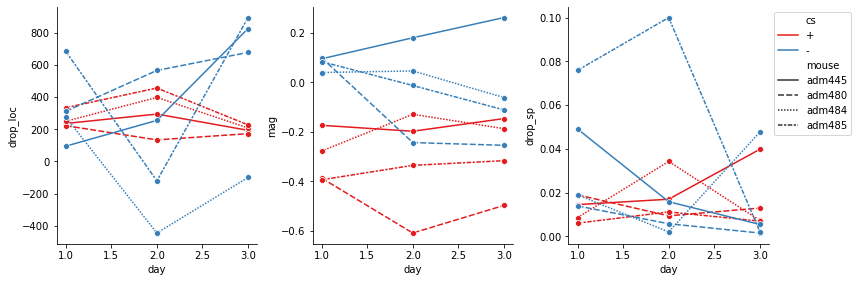

In [481]:
fig, ax = plt.subplots(1,3, figsize = (12,4))
tmp = params.T.reset_index()
sns.lineplot(data = tmp, x='day', y='drop_loc', style='mouse', hue = 'cs',marker = 'o', ax= ax[0], legend=False)
sns.lineplot(data = tmp, x='day', y='mag', style='mouse', hue = 'cs', marker = 'o', ax= ax[1], legend=False)
g = sns.lineplot(data = tmp, x='day', y='drop_sp', style='mouse', hue = 'cs', marker = 'o', ax= ax[2])
g.legend(loc='upper left', bbox_to_anchor=(1,1))
sns.despine()
fig.tight_layout(pad=1.)

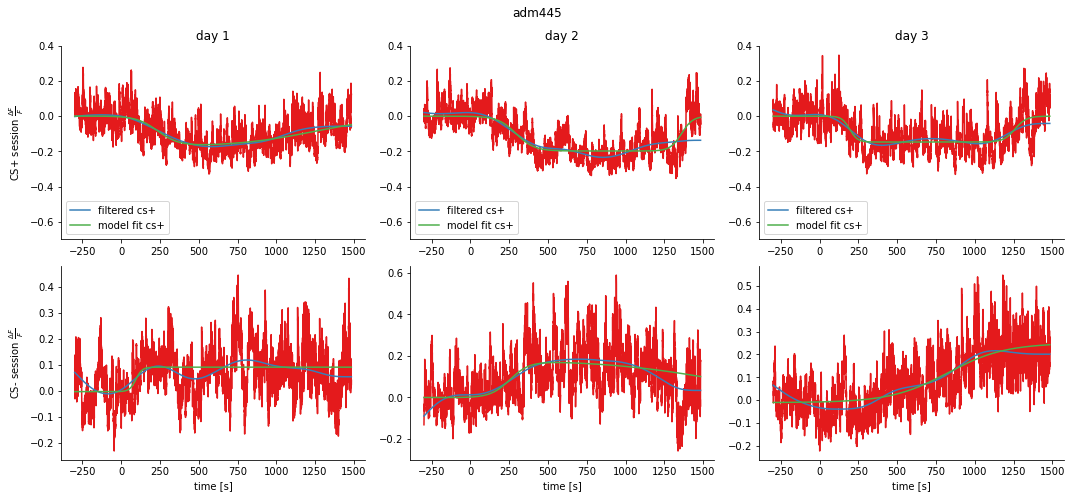

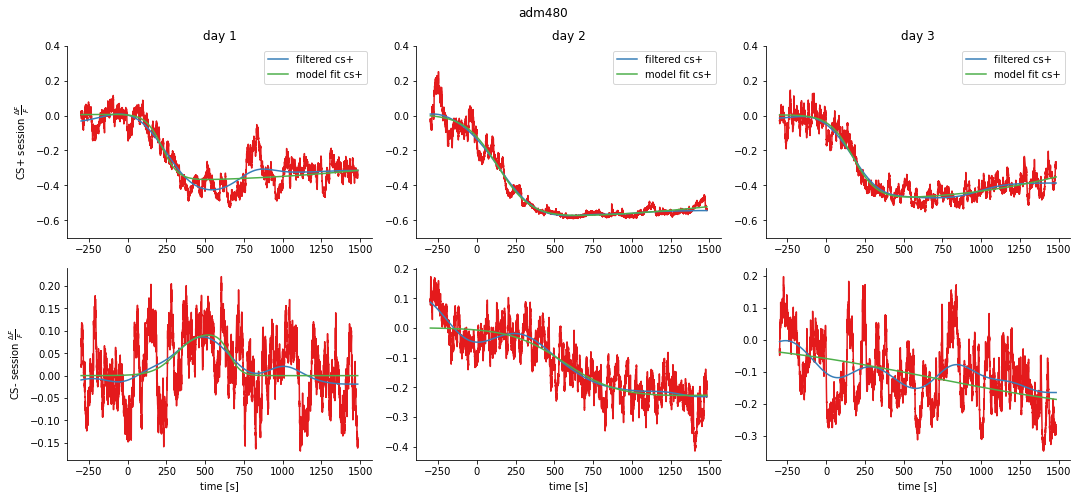

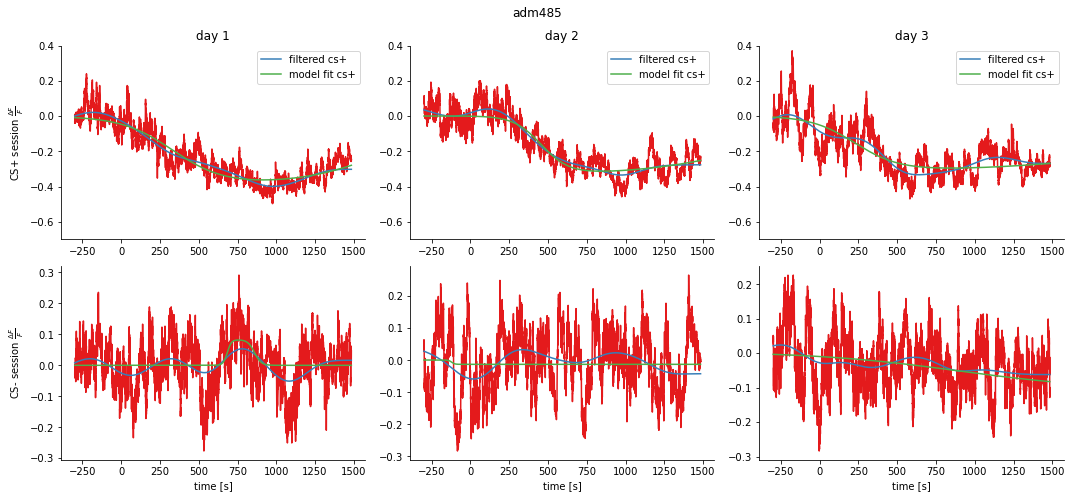

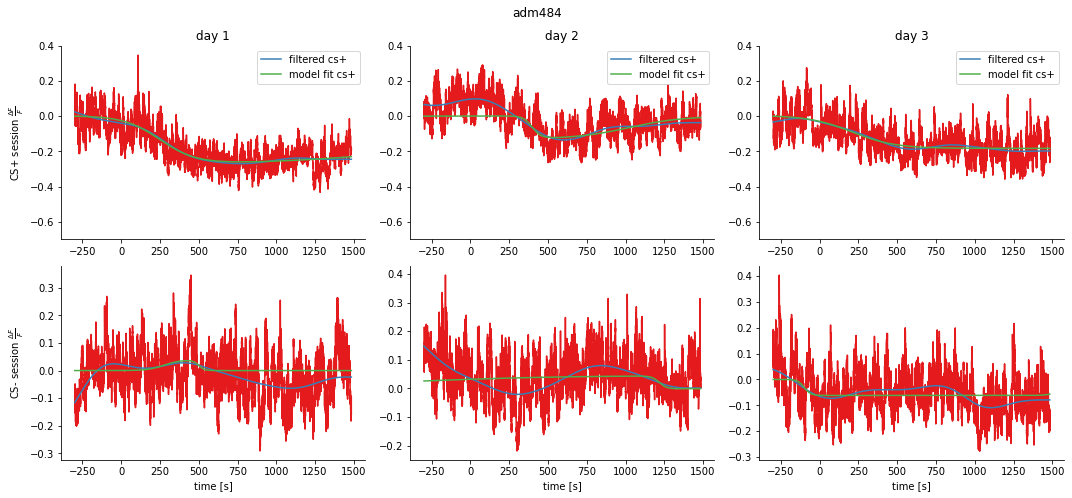

In [482]:
fitted = params.apply(lambda x: model(training.t, *x.tolist()))
fitted.index = training.t
m = 'adm480'
for m in training.mice:
    fig, ax = plt.subplots(2,3, figsize=(15,7))
    for i in range(3):
        ax[0,i].plot(training_490.loc[:,(i+1,m,'+')])
        ax[0,i].plot(training.t, signal.filtfilt(*detrend_params, training_490.loc[:,(i+1,m,'+')].values, axis=0), label ='filtered cs+')
        ax[0,i].plot(fitted.loc[:,(i+1,m,'+')], label = 'model fit cs+')
        ax[1,i].plot(training_490.loc[:,(i+1,m,'-')])
        ax[1,i].plot(training.t, signal.filtfilt(*detrend_params, training_490.loc[:,(i+1,m,'-')].values, axis=0), label ='filtered cs-')
        ax[1,i].plot(fitted.loc[:,(i+1,m,'-')], label = 'model fit cs-')
        ax[0,i].set_title(f'day {i+1}')
        ax[0,i].legend()
        ax[0,i].set_ylim(-.7,.4)
        ax[1,i].set_xlabel('time [s]')
    ax[0,0].set_ylabel(r"CS+ session $\frac{\Delta F}{F}$")
    ax[1,0].set_ylabel(r"CS- session $\frac{\Delta F}{F}$")
    sns.despine()
    fig.suptitle(m)
    fig.tight_layout(pad=1.0)


In [ ]:
# create model schmeatic (assuming we use the model)
# define dummy parameters
x = training.all_490.index
# h1, w1, loc1, ret, w2, dloc2 = 1, 400, 400, .7, 500, 700 
# y = agrp_model(training.t, h1, w1, loc1, ret, w2, dloc2)

# create the plot
fig = plt.figure(figsize = (12,15))
# ax = fig.add_subplot(421)
# pal = sns.color_palette('rocket', 6)
# ax.set_prop_cycle(color = pal)

# # plot the signal and indicate the stim time
# ax.plot(x, y, c = 'k')
# ylim = ax.get_ylim()
# ax.vlines([0], ylim[0], ylim[1], color = 'gray', linestyle = '--')

# # plot parameters for first sigmoid
# ax.errorbar(loc1, y = -h1/2, xerr = w1/2, marker = 'o', capsize= 5)
# ax.plot([loc1,loc1], [ylim[0], -h1/2], c = pal[0], ls = '--')
# ax.text(loc1 + w1/2 + 100, -h1/2, r'$w_1$', horizontalalignment='center')
# ax.plot([0, loc1], [ylim[0], ylim[0]], c = pal[0])
# ax.text(loc1/2, ylim[0]+ .05, r'$l$', horizontalalignment='center')


# # distance between sigmoids
# ax.errorbar(loc1 + w1/2 + dloc2/2, y= (ret - 3) * h1/4, xerr=dloc2/2,  capsize= 5)
# ax.text(loc1 + w1/2  + dloc2 + 100, (ret - 3) * h1/4, r'$d$', horizontalalignment='center')

# # second sigmoid width
# ax.errorbar(loc1 + w1/2 + dloc2 +w2/2, ret*h1/2 -h1, xerr = w2/2, marker = 'o', capsize= 5)
# ax.text(loc1 + w1/2 + dloc2 +w2 + 100, ret*h1/2 -h1 , r'$w_2$', horizontalalignment='center')

# # height of second sigmoid as a fraction of first sigmoid height
# ax.errorbar(2050, ret*h1/2 -h1, yerr = ret*h1/2, capsize = 5)
# ax.text(2150, ret*h1/2 -h1, r'$r$')

# # height of first sigmoid
# ax.errorbar(2350, -h1/2, yerr = h1/2, capsize = 5)
# ax.text(2450, -h1/2, r'$h$')
# sns.despine(left = True)
# ax.axis('off')